In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("hotel_bookings_data.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## PRE PROCESSING

In [4]:
# MENGECEK NILAI NULL PADA SETIAP KOLOM
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [5]:
# MENGISI NILAI NULL

# Mengganti nilai null pada kolom city dengan kota yang paling sering muncul
most_frequent_city = df['city'].mode()[0]
df['city'].fillna(most_frequent_city, inplace=True)

# Mengisi nilai null children, agent dan company dengan 0
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# INVALID VALUES
df['meal'].unique()

# Mengganti 'undefined dengan 'no meal'
df ['meal'] = df['meal'].replace('Undefined', 'No Meal')

# Unecessary Data
df["total_guest"]=df.adults+df.children.astype("int64")+df.babies
df_prep = df[df["total_guest"] > 0].copy()

In [6]:
# Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
df_tabel = df_prep.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_tabel.columns = ['hotel_type', 'arrival_month', 'unique_year', 'count_guest']

# Mengurutkan data berdasarkan bulan
df_tabel["arrival_month"] = pd.Categorical(df_tabel["arrival_month"],
                             categories=["January", "February", "March", "April", "May", "June", "July",
                                         "August", "September", "October", "November", "December"],
                             ordered=True)
df_tabel = df_tabel.sort_values(["arrival_month"], ignore_index=True)

df_tabel['average_booking'] = round(df_tabel['count_guest']/df_tabel['unique_year'])
df_tabel.head()

,hotel_type,arrival_month,unique_year,count_guest,average_booking
0,City Hotel,January,2,4336,2168.0
1,Resort Hotel,January,2,2435,1218.0
2,City Hotel,February,2,4114,2057.0
3,Resort Hotel,February,2,2645,1322.0
4,City Hotel,March,2,3730,1865.0


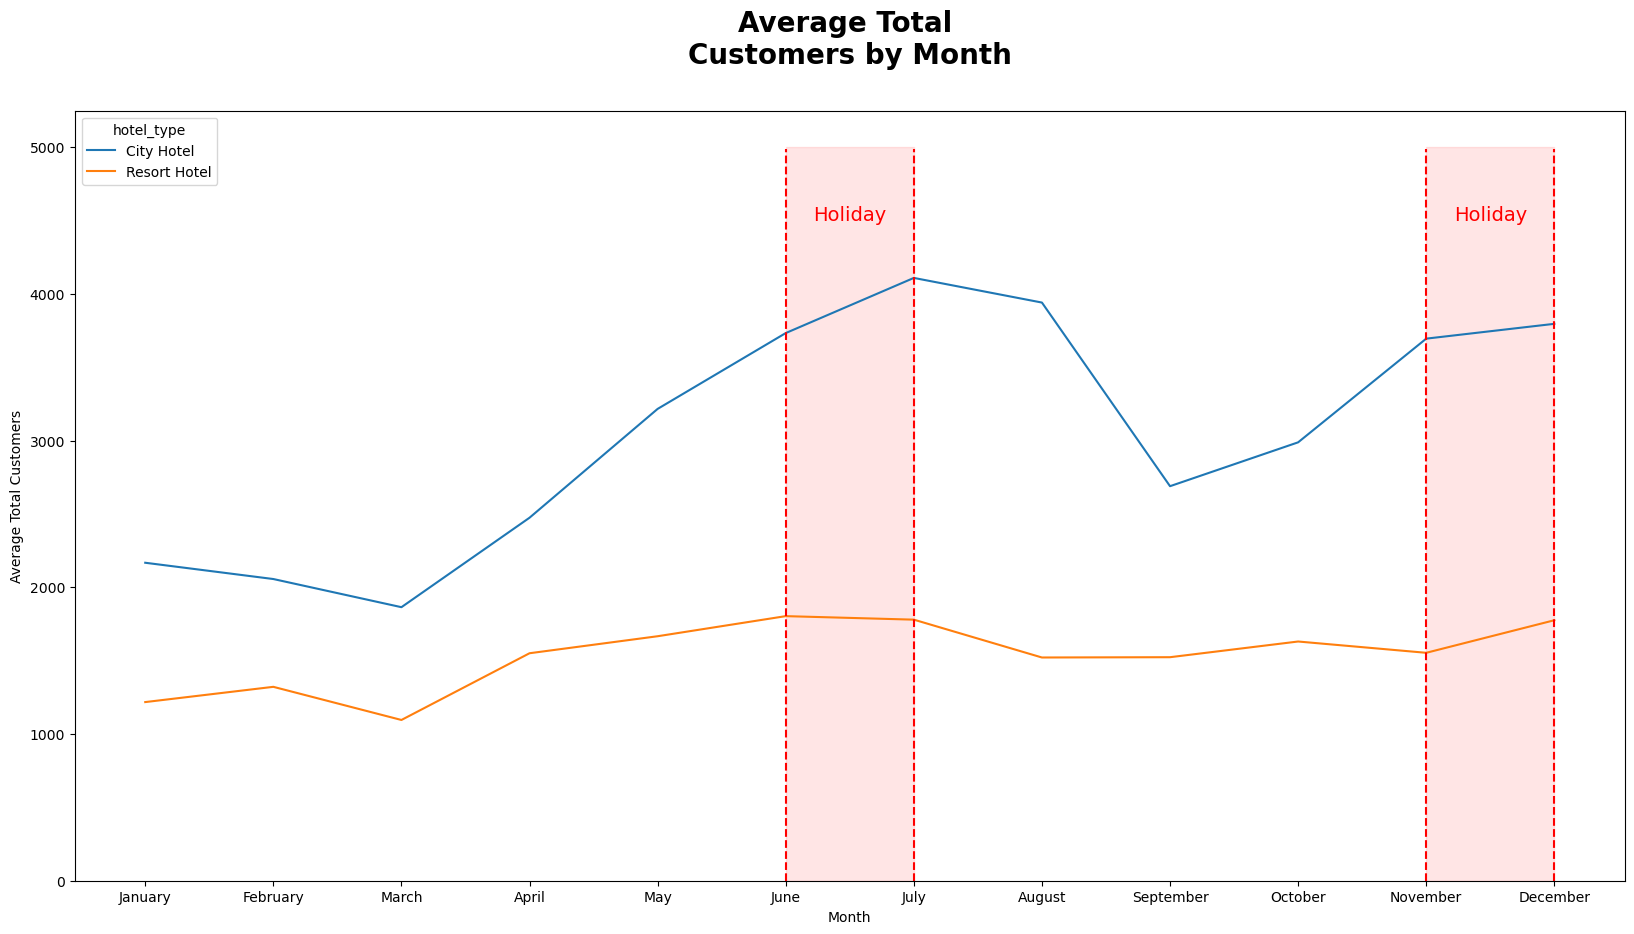

In [7]:
plt.figure(figsize=(20,10))
sns.lineplot(x='arrival_month', y='average_booking', data=df_tabel, hue='hotel_type')
plt.xlabel('Month')
plt.ylabel('Average Total Customers')
plt.title('Average Total \nCustomers by Month', fontsize=20, fontweight='bold', y=1.05)

plt.axvline(x=5, color='red', linestyle='--', ymax= 0.95)
plt.axvline(x=6, color='red', linestyle='--', ymax= 0.95)
plt.stackplot(np.arange(5,7), [5000], color='red', alpha=0.1)
plt.text(x=5.5, y=4500, s='Holiday', color='red', fontsize=14, ha='center')


plt.axvline(x=10, color='red', linestyle='--', ymax= 0.95)
plt.axvline(x=11, color='red', linestyle='--', ymax= 0.95)
plt.stackplot(np.arange(10,12), [5000], color='red', alpha=0.1)
plt.text(x=10.5, y=4500, s='Holiday', color='red', fontsize=14, ha='center')

plt.show()

## INSIGHTS

- Pemesanan city hotel selalu lebih tinggi dibandingkan resort hotel
- Terjadi kenaikan tertinggi pemesanan hotel pada bulan Juni-Juli dan November-Desember, hal ini dikarenakan pada bulan itu sedang masa holiday
- Pemesanan terendah terjadi di bulan Maret

In [8]:
df2 = df.copy()

# Menambahkan kolom "stay_duration" yang merupakan hasil dari penjumlahan jumlah malam yang dihabiskan pada akhir pekan dan jumlah malam yang dihabiskan pada hari kerja
df2["stay_duration"] = df2.stays_in_weekend_nights + df2.stays_in_weekdays_nights

# Menambahkan kolom "duration" yang menentukan kategori durasi menginap
df2['duration'] = df2['stay_duration'].apply(lambda value: 'A few days' if value < 7 else ('A few weeks' if value <= 31 else ('Several months')))

# Menampilkan jumlah kemunculan setiap kategori durasi
print(df2['duration'].value_counts())

# Membuat DataFrame df_tabel_durasi yang berisi informasi durasi menginap dan jumlah tamu
df_tabel_durasi = df2.groupby(['hotel', 'stay_duration', 'duration'])['total_guest'].agg(['count']).reset_index()
df_tabel_durasi.columns = ['type_hotel', 'duration_of_stay', 'duration', 'count_guest']

# Menampilkan DataFrame df_tabel_durasi
df_tabel_durasi

A few days        105478
A few weeks        13888
Several months        24
Name: duration, dtype: int64


,type_hotel,duration_of_stay,duration,count_guest
0,City Hotel,0,A few days,331
1,City Hotel,1,A few days,13272
2,City Hotel,2,A few days,21426
3,City Hotel,3,A few days,21381
4,City Hotel,4,A few days,12557
...,...,...,...,...
71,Resort Hotel,45,Several months,1
72,Resort Hotel,46,Several months,1
73,Resort Hotel,56,Several months,2
74,Resort Hotel,60,Several months,1


C:\Users\fazah\AppData\Local\Temp\ipykernel_13316\635749897.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(data=df_tabel_durasi, x='duration', y='count_guest', hue='type_hotel', palette='Blues', ci=None, estimator=sum)


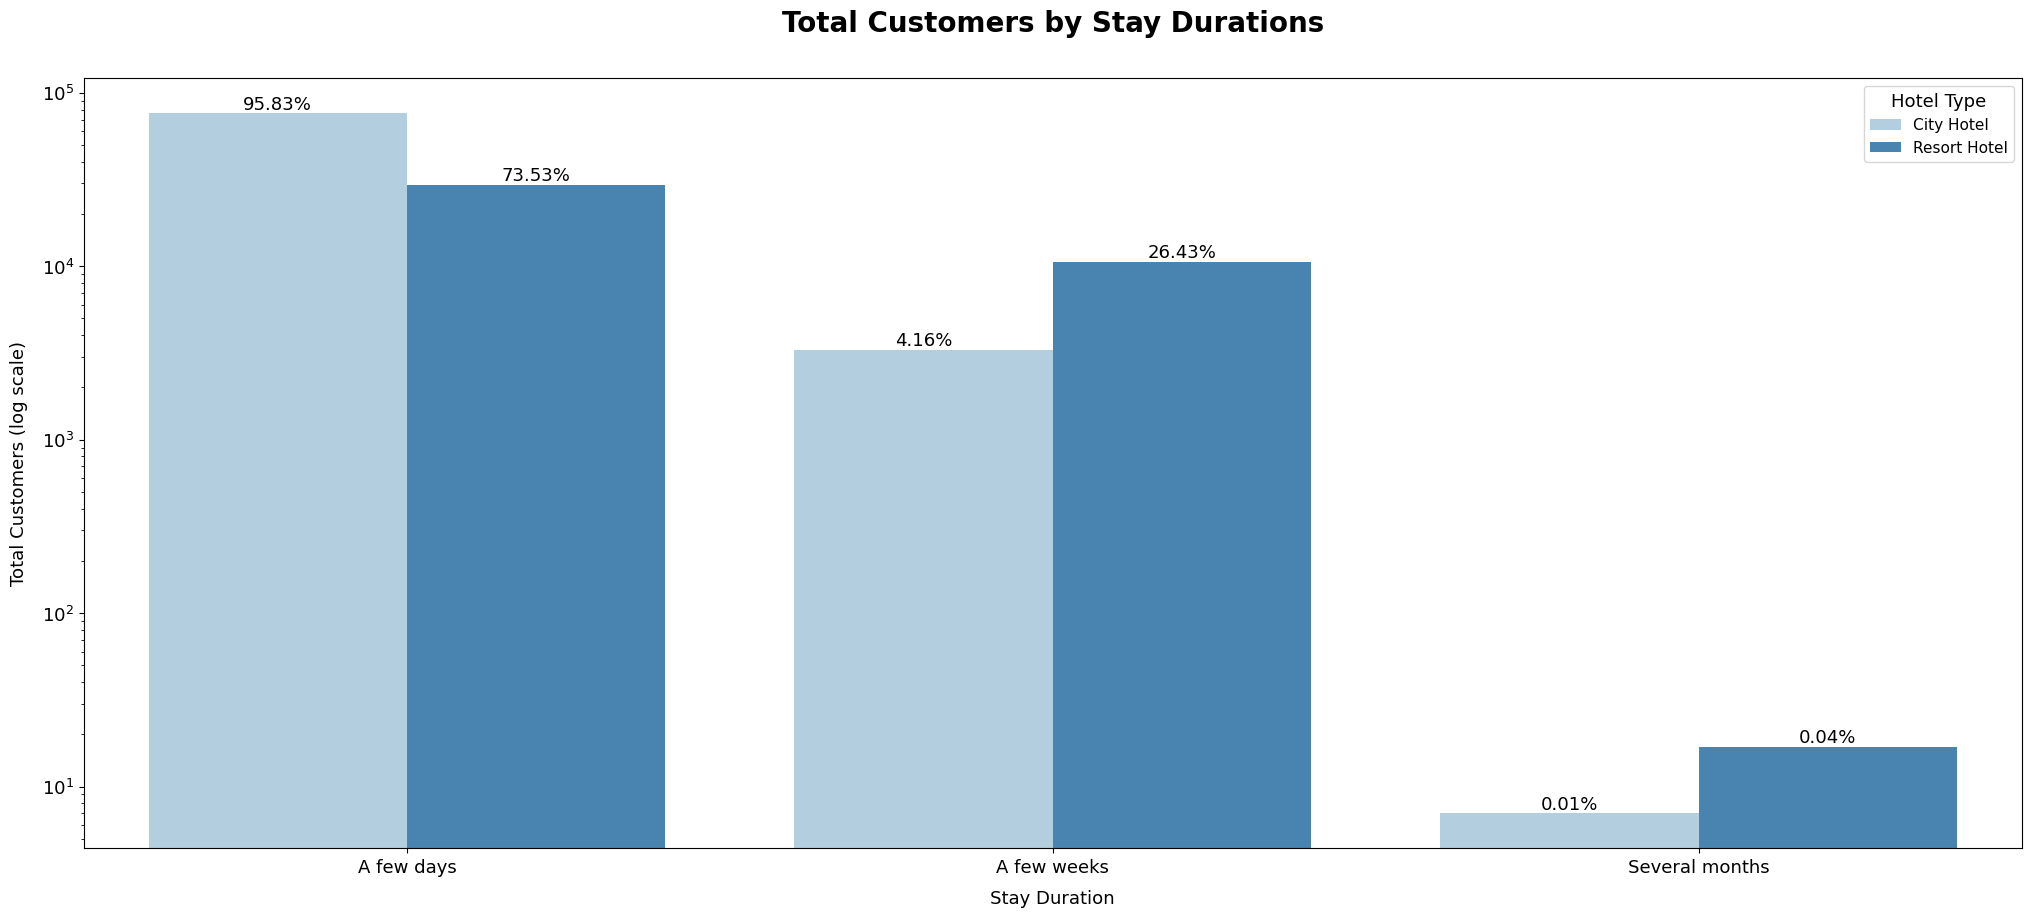

In [9]:
plt.figure(figsize=(25,10))

# Bar plot dengan palette 'Blues', ci=None untuk menghilangkan error bar, dan plt.yscale('log') untuk skala logaritmik pada sumbu y
g = sns.barplot(data=df_tabel_durasi, x='duration', y='count_guest', hue='type_hotel', palette='Blues', ci=None, estimator=sum)
# plt.ylim(5000)
plt.yscale('log')

# Menetapkan label dan judul
plt.xlabel('Stay Duration', fontsize=13, labelpad=10)
plt.ylabel('Total Customers (log scale)', fontsize=13, labelpad=10)
plt.title('Total Customers by Stay Durations', fontsize=20, fontweight='bold', y=1.05)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Menambahkan keterangan di kanan atas
plt.legend(title='Hotel Type', title_fontsize='13', loc='upper right', fontsize='11')

total_city_hotel_guests = df_tabel_durasi[df_tabel_durasi['type_hotel'] == 'City Hotel']['count_guest'].sum()
total_resort_hotel_guests = df_tabel_durasi[df_tabel_durasi['type_hotel'] == 'Resort Hotel']['count_guest'].sum()

container_city = (g.containers[0].datavalues / total_city_hotel_guests) * 100
rounded_city = [f"{round(num, 2)}%" for num in container_city]

container_resort = (g.containers[1].datavalues / total_resort_hotel_guests) * 100
rounded_resort = [f"{round(num, 2)}%" for num in container_resort]

plt.bar_label(g.containers[0], fontsize=13, fmt='%.2f%%', labels=rounded_city)
plt.bar_label(g.containers[1], fontsize=13, fmt='%.2f%%', labels=rounded_resort)

# Menampilkan plot
plt.show()

In [11]:
# Jumlah cancel hotel serta rasionya
x = df2[df2['is_canceled'] == 0].groupby(['hotel','duration'])['is_canceled'].count().reset_index()
y = df2[df2['is_canceled'] == 1].groupby(['hotel','duration'])['is_canceled'].count().reset_index()
x['canceled'] = y['is_canceled']
x.columns = ['hotel', 'duration','not canceled','canceled']
x['rasio'] = x['canceled'] / (x['not canceled']+x['canceled']) * 100
x

,hotel,duration,not canceled,canceled,rasio
0,City Hotel,A few days,44405,31618,41.590045
1,City Hotel,A few weeks,1818,1482,44.909091
2,City Hotel,Several months,5,2,28.571429
3,Resort Hotel,A few days,21697,7758,26.338482
4,Resort Hotel,A few weeks,7227,3361,31.743483
5,Resort Hotel,Several months,14,3,17.647059


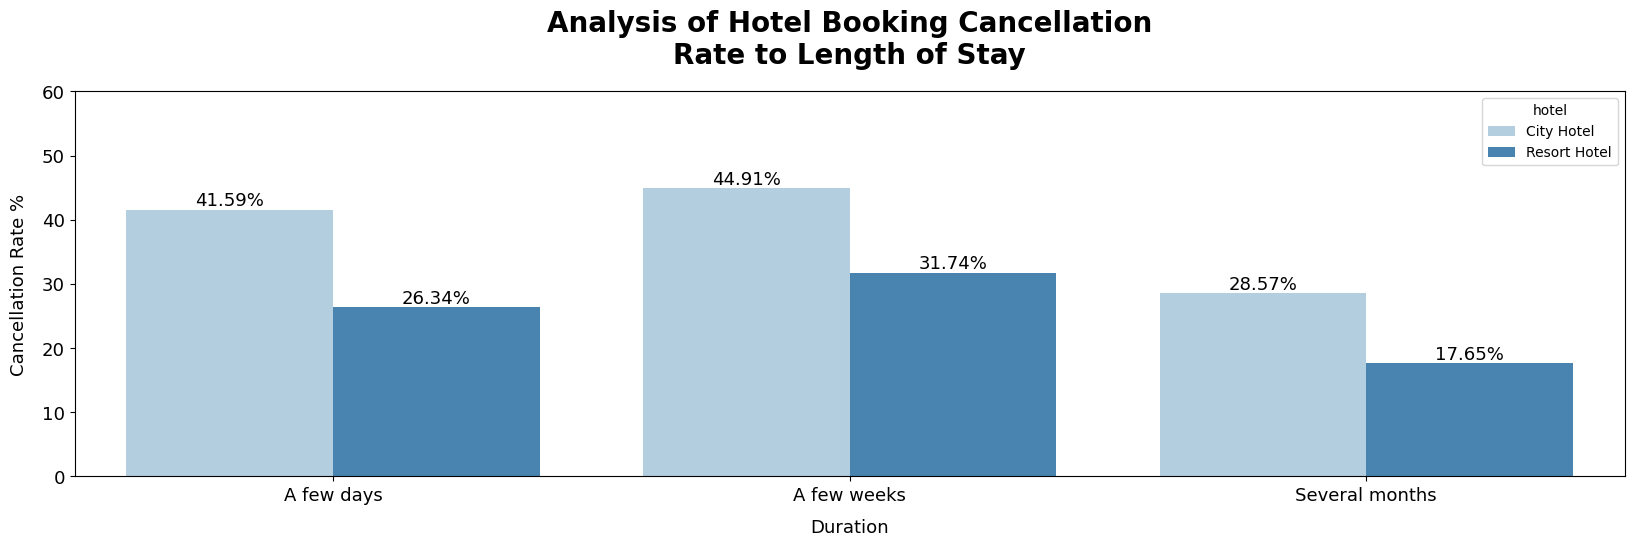

In [12]:
plt.figure(figsize=(20,5))
g = sns.barplot(x='duration', y='rasio', data=x, hue='hotel', palette='Blues')
plt.xlabel('Duration', fontsize=13, labelpad=10)
plt.ylabel('Cancellation Rate %', fontsize=13, labelpad=10)
plt.title('Analysis of Hotel Booking Cancellation\nRate to Length of Stay', fontsize=20, fontweight='bold', y=1.05)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.bar_label(g.containers[0], fontsize=13, label_type='edge',fmt='%.2f%%')
plt.bar_label(g.containers[1], fontsize=13,fmt='%.2f%%')
plt.ylim(0,60)
plt.show()

## INSIGHTS

- Customer biasanya menginap selama 2-3 hari
- Rasio pembatalan terbanyak untuk city hotel dan resort hotel berada di durasi "a few weeks" dengan jumlah hari kurang dari 31 hari, kemudian disusul dengan "a few days" dan "Several months"

In [15]:
# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate
df3 = df2.copy()

# Categorize the lead_time column
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

# perform data aggregation to calculate the number of bookings based on the lead_time group that has been created and based on hotel type
df3_book = df3.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df3_pivot = df3_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df3_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_pivot['all_bookings'] = df3_pivot['not_canceled']+df3_pivot['canceled']
df3_pivot['pct_canceled'] = df3_pivot['canceled']*100.0/(df3_pivot['all_bookings']) 

df3_pivot

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18163,5199,23362,22.254088
1,City Hotel,30-60,7281,4608,11889,38.758516
2,City Hotel,60-90,5216,3692,8908,41.445891
3,City Hotel,90-120,3961,3486,7447,46.810796
4,City Hotel,120-150,3070,2543,5613,45.305541
5,City Hotel,150-180,2446,2717,5163,52.624443
6,City Hotel,180-210,1801,1793,3594,49.888703
7,City Hotel,210-240,1225,1280,2505,51.097804
8,City Hotel,240-270,882,1242,2124,58.474576
9,City Hotel,270-300,660,1859,2519,73.799127


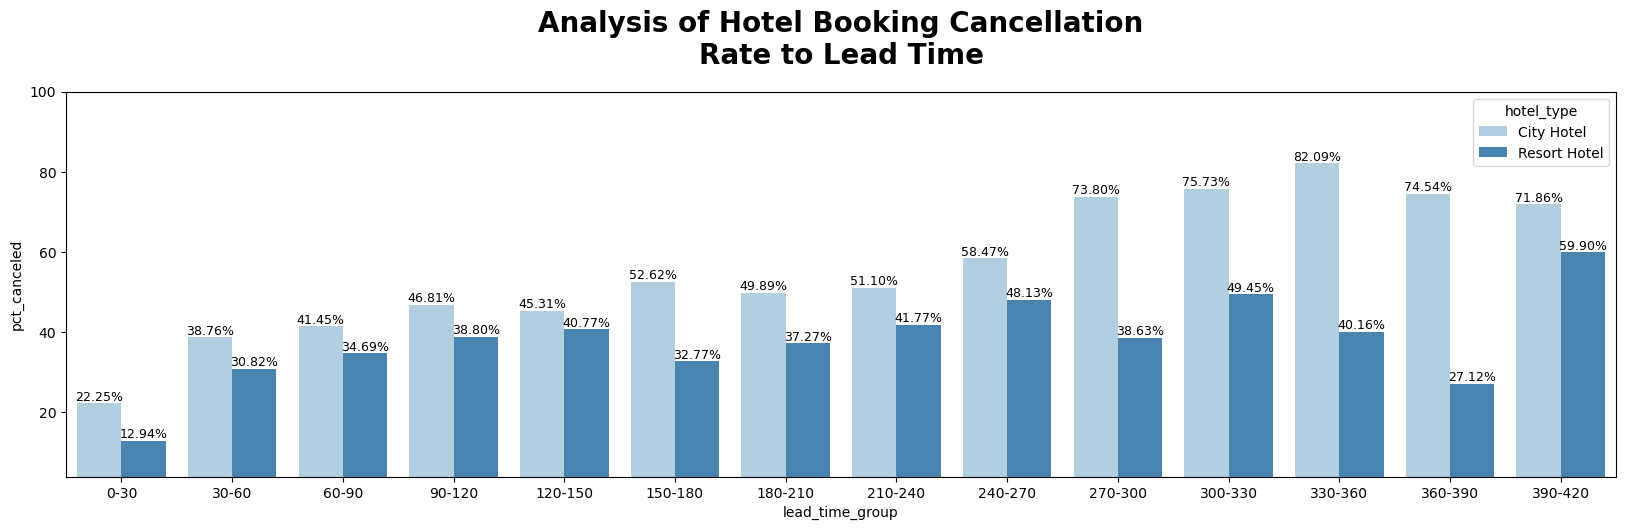

In [14]:
plt.figure(figsize=(20,5))
y = sns.barplot(x='lead_time_group', y='pct_canceled', data=df3_pivot, hue='hotel_type', palette='Blues')
plt.title('Analysis of Hotel Booking Cancellation\nRate to Lead Time', fontsize=20, fontweight='bold', y=1.05)
plt.bar_label(y.containers[0], fontsize=9, label_type='edge',fmt='%.2f%%')
plt.bar_label(y.containers[1], fontsize=9, label_type='edge',fmt='%.2f%%')
plt.ylim(4,100)
plt.show()